# 0. Introdução

**Trabalho**:

Aluno: Maicon Dall'Agnol

R.A.: 151161868

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Escolha dois conjuntos de dados para trabalhar o problema de regressão. Separe cada dataset em conjunto de treinamento e conjunto de teste. Explique o seu critério de separação e o método utilizado.
- Você deverá implementar soluções para cada dataset usando:
- - regressão linear (ou regressão múltipla)
- - regressão polinomial
- - SVR (use os kernels linear, sigmoide, RBF e polinomial)
- - rede neural (MLP ou RBF). 
- Descreva os parâmetros/arquiteturas de cada modelo.
- Compare os resultados (para treinamento e teste) com as medidas de desempenho SEQ, EQM, REQM, EAM e r² , e verifique qual a melhor opção dentre os métodos implementados que melhor se ajusta a seus dados.
- Você deverá fazer a visualização dos dados originais com os dados ajustados em cada experimento, tanto para o conjunto de treinamento quanto para o de teste. Os gráficos devem conter títulos nos eixos e legenda. Comente os resultados encontrados na visualização.

## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [1]:
#Utils
import pandas as pd
import numpy as np
import pandas_profiling
import math

#Preprocess
from sklearn.preprocessing import StandardScaler

# Split
from sklearn.model_selection import train_test_split

# Regressores
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

#Metricas
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Visualização
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Dados

O conjunto de dados contém 9568 pontos de dados coletados de uma Central Elétrica de Ciclo Combinado ao longo de 6 anos (2006-2011)


Fonte: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

## 1.1 Informações sobre os dados:

#### Atributos:
- Temperatura (T) na faixa de 1,81 ° C e 37,11 ° C, 
- Pressão ambiente (AP) na faixa de 992,89-1033,30 milibar, 
- Umidade Relativa (UR) na faixa de 25,56% a 100,16 % 
- Vácuo de exaustão (V) na faixa de 25,36-81,56 cm Hg 
- Saída de energia elétrica horária líquida (EP) 420,26-495,76 MW 

## Importando Dataset

In [2]:
data_raw = pd.read_excel('dados/Folds5x2_pp.xlsx')

In [3]:
pandas_profiling.ProfileReport(data_raw)

Number of variables,5
Number of observations,9568
Total Missing (%),0.0%
Total size in memory,373.8 KiB
Average record size in memory,40.0 B
Numeric,5
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## Visualização

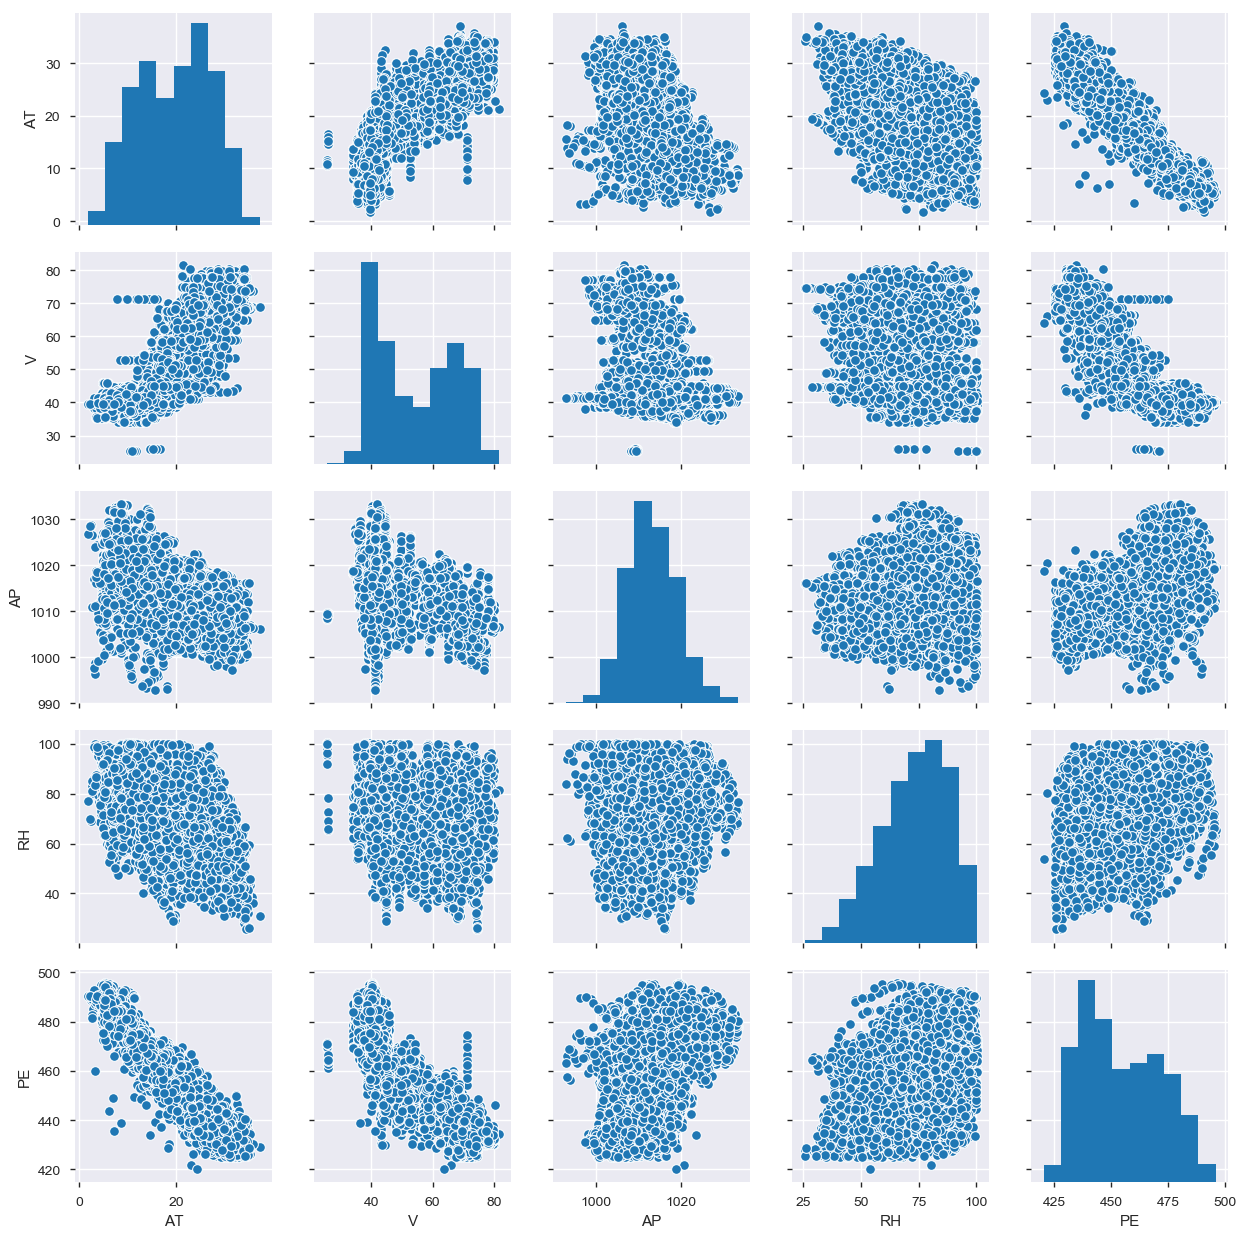

In [4]:
sns.pairplot(data_raw)

In [5]:
plt.clf()

<Figure size 800x550 with 0 Axes>

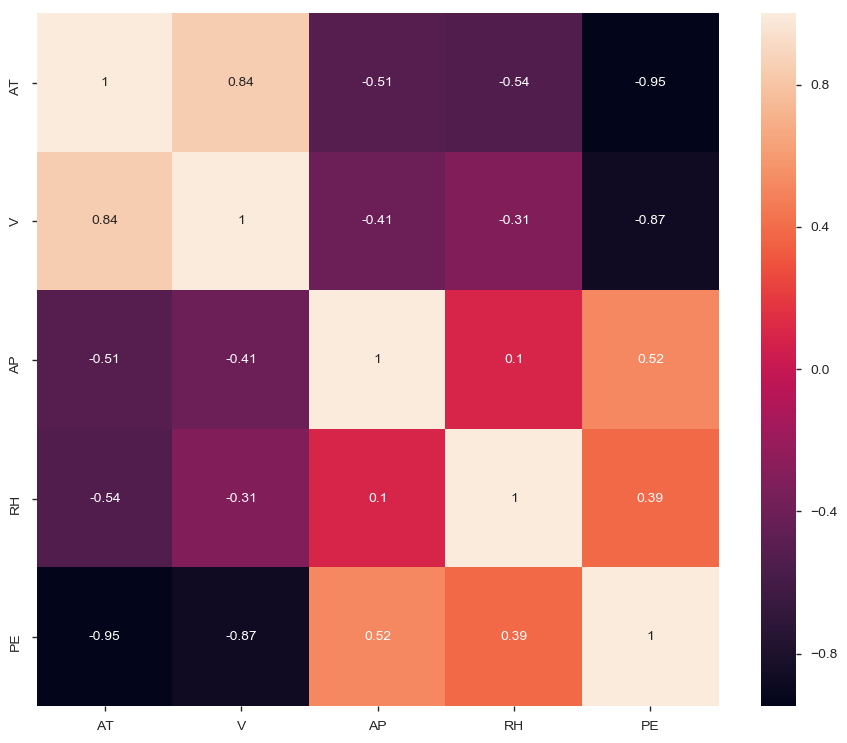

In [6]:
plt.subplots(figsize=(11, 9))
sns.heatmap(data_raw.corr(), annot=True)

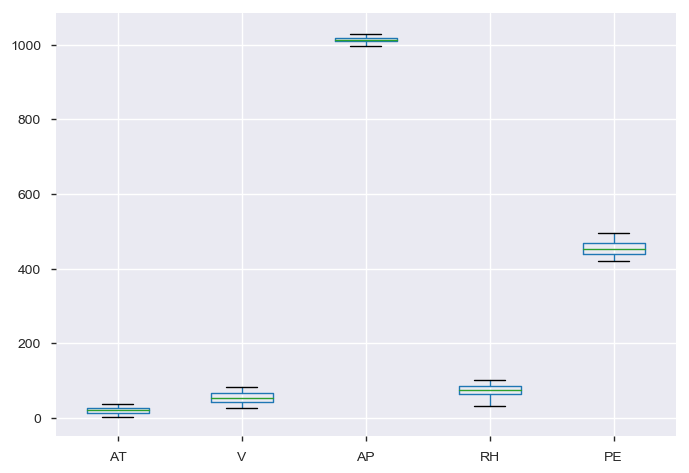

In [7]:
data_raw.plot.box()

## Escalonando

In [8]:
scaler = StandardScaler().fit(data_raw)
data_scaled = scaler.transform(data_raw)

In [9]:
data_scaled_df = pd.DataFrame(data_scaled, columns=['AT','V','AP','RH','PE'])

In [10]:
data_scaled_df.head()

,AT,V,AP,RH,PE
0,-0.629519,-0.987297,1.820488,-0.009519,0.521208
1,0.741909,0.681045,1.141863,-0.974621,-0.585664
2,-1.951297,-1.173018,-0.185078,1.289840,2.003679
3,0.162205,0.237203,-0.508393,0.228160,-0.462028
4,-1.185069,-1.322539,-0.678470,1.596699,1.144666


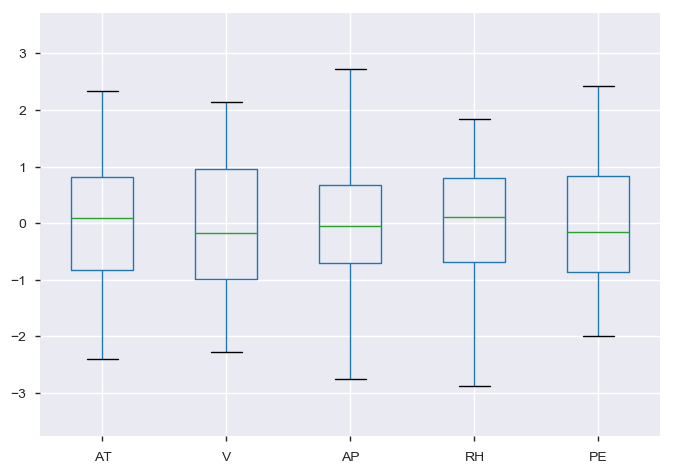

In [11]:
data_scaled_df.plot.box()

## Utilidades

In [12]:
lista_metricas_treino = []
lista_metricas_teste = []

In [13]:
def metricas(y_true, y_pred, alg):
    r2 = r2_score(y_true, y_pred)
    eqm = mean_squared_error(y_true, y_pred)
    seq = len(y_true)*eqm
    reqm = math.sqrt(eqm)
    
    return {'Algoritmo':alg, 'R2':r2, 'EQM':eqm, 'REQM':reqm, 'SEQ':seq}

## Separando conjuntos de Treino e Teste

Para a separação utilizou-se do train_test_split que divide o conjunto em treino e teste aleatóriamente

In [14]:
train, test = train_test_split(data_scaled_df, test_size = 0.2, shuffle=True)

x_train = train.drop(columns=['PE'])
y_train = train['PE']

x_test = test.drop(columns=['PE'])
y_test = test['PE']

## Aplicando a Regressão

### Regressão Linear

In [15]:
lire = LinearRegression()

In [16]:
lire.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Avaliação para Teste

In [17]:
y_pred = lire.predict(x_test)
linear_metricas = metricas(y_test, y_pred, 'Regressão Linear - Teste')
lista_metricas_teste.append(linear_metricas)

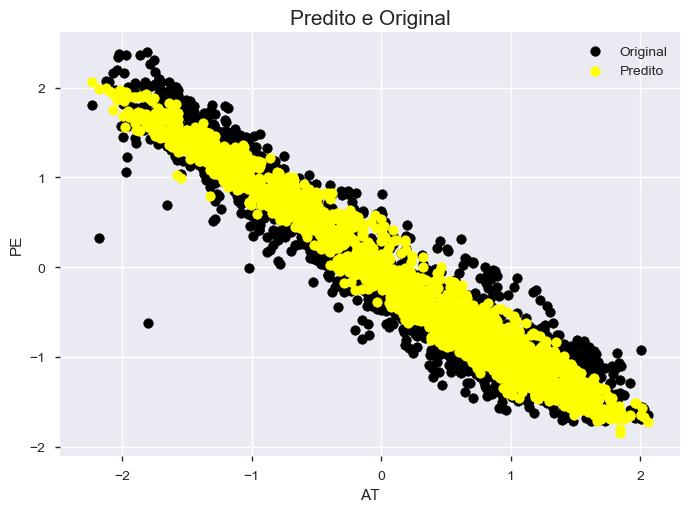

In [18]:
plt.scatter(x_test['AT'], y_test,  color='black')
plt.scatter(x_test['AT'], y_pred, color='yellow')
plt.xlabel("AT")
plt.ylabel("PE")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [19]:
y_pred = lire.predict(x_train)
linear_metricas = metricas(y_train, y_pred, 'Regressão Linear - Treino')
lista_metricas_treino.append(linear_metricas)

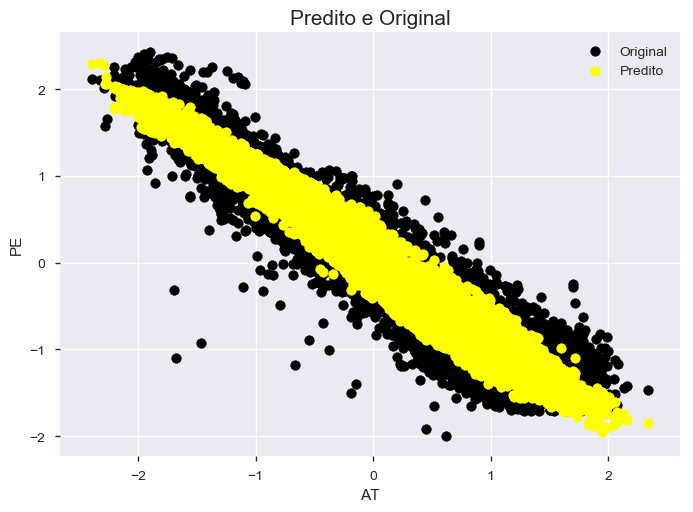

In [20]:
plt.scatter(x_train['AT'], y_train,  color='black')
plt.scatter(x_train['AT'], y_pred, color='yellow')
plt.xlabel("AT")
plt.ylabel("PE")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## SVR

### Kernel RBF

In [21]:
svr_reg = SVR(kernel='rbf')

In [22]:
svr_reg.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

## Avaliação para Teste

In [23]:
y_pred = svr_reg.predict(x_test)
svr_metricas = metricas(y_test, y_pred, 'SVR - RBF - Teste')
lista_metricas_teste.append(svr_metricas)

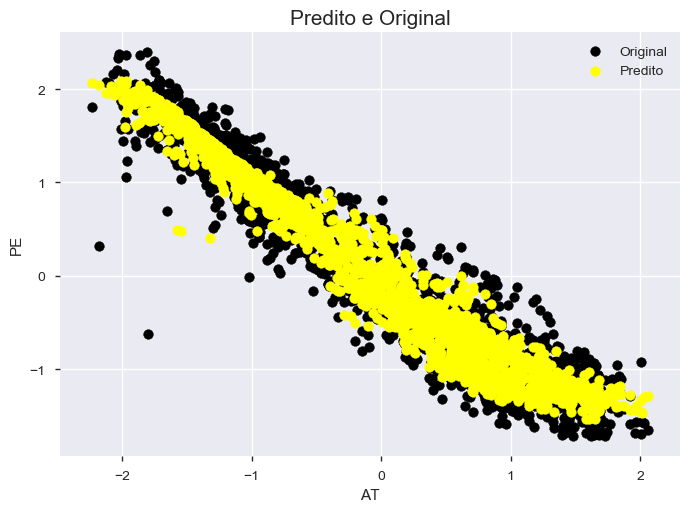

In [24]:
plt.scatter(x_test['AT'], y_test,  color='black')
plt.scatter(x_test['AT'], y_pred, color='yellow')
plt.xlabel("AT")
plt.ylabel("PE")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [25]:
y_pred = svr_reg.predict(x_train)
svr_metricas = metricas(y_train, y_pred, 'SVR - RBF - Treino')
lista_metricas_treino.append(svr_metricas)

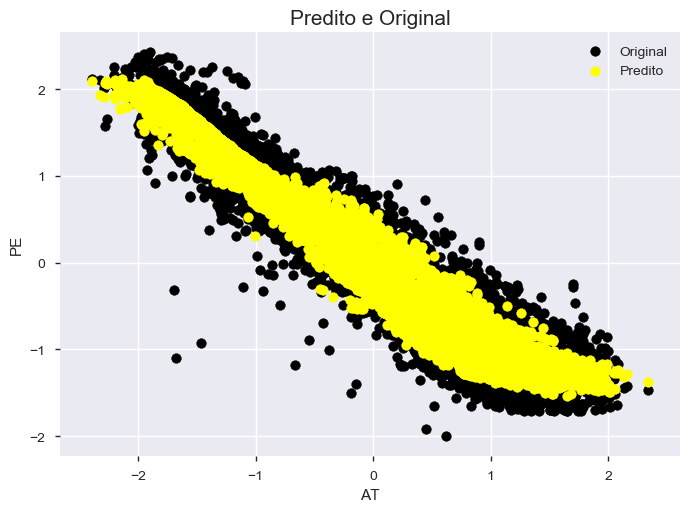

In [26]:
plt.scatter(x_train['AT'], y_train,  color='black')
plt.scatter(x_train['AT'], y_pred, color='yellow')
plt.xlabel("AT")
plt.ylabel("PE")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

### Kernel Linear

In [27]:
svr_reg = SVR(kernel='linear')

In [28]:
svr_reg.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

## Avaliação para Teste

In [29]:
y_pred = svr_reg.predict(x_test)
metricas_svr = metricas(y_test, y_pred, 'SVR - Linear - Teste')
lista_metricas_teste.append(metricas_svr)

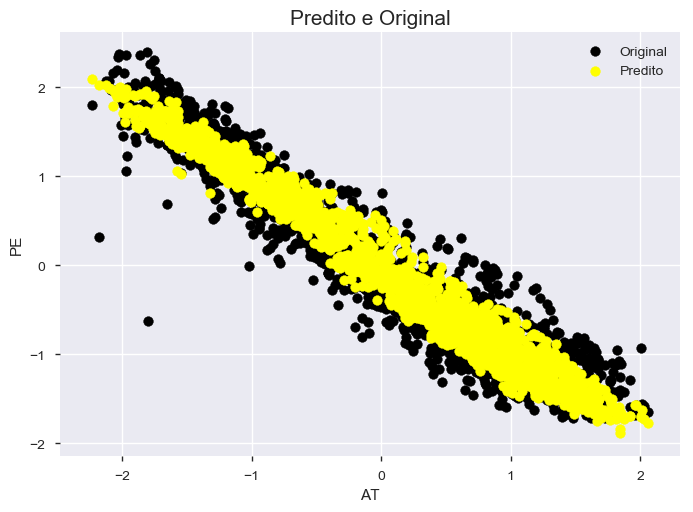

In [30]:
plt.scatter(x_test['AT'], y_test,  color='black')
plt.scatter(x_test['AT'], y_pred, color='yellow')
plt.xlabel("AT")
plt.ylabel("PE")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [31]:
y_pred = svr_reg.predict(x_train)
svr_metricas = metricas(y_train, y_pred, 'SVR - Linear - Treino')
lista_metricas_treino.append(svr_metricas)

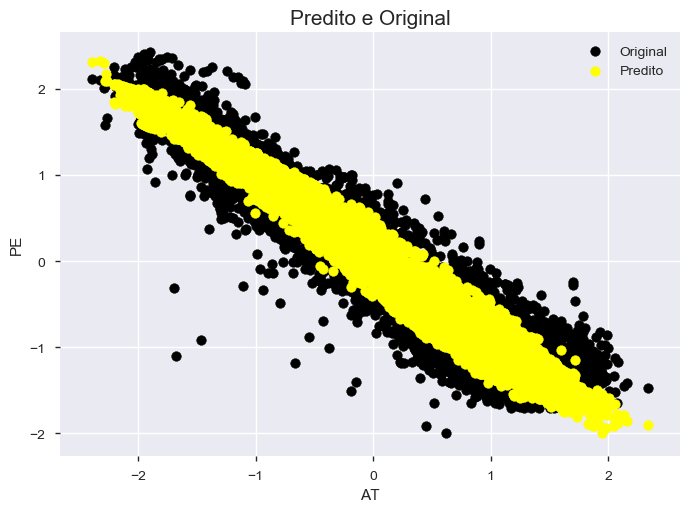

In [32]:
plt.scatter(x_train['AT'], y_train,  color='black')
plt.scatter(x_train['AT'], y_pred, color='yellow')
plt.xlabel("AT")
plt.ylabel("PE")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

### Kernel Sigmoide

In [33]:
train, test = train_test_split(data_raw, test_size = 0.2, shuffle=True)

x_train_sig = train.drop(columns=['PE'])
y_train_sig  = train['PE']

x_test_sig  = test.drop(columns=['PE'])
y_test_sig  = test['PE']

In [34]:
svr_reg = SVR(kernel='sigmoid')

In [35]:
svr_reg.fit(x_train_sig , y_train_sig )

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='sigmoid', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

## Avaliação para Teste

In [36]:
y_pred_sig  = svr_reg.predict(x_test_sig)
metricas_svr = metricas(y_test_sig , y_pred_sig , 'SVR - Sigmoide - Teste')
lista_metricas_teste.append(metricas_svr)

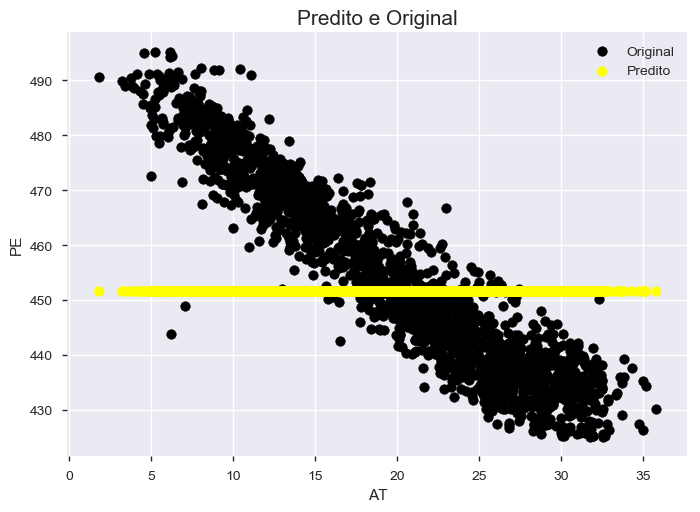

In [37]:
plt.scatter(x_test_sig ['AT'], y_test_sig ,  color='black')
plt.scatter(x_test_sig ['AT'], y_pred_sig , color='yellow')
plt.xlabel("AT")
plt.ylabel("PE")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [38]:
y_pred_sig  = svr_reg.predict(x_train_sig)
svr_metricas = metricas(y_train_sig , y_pred_sig , 'SVR - Sigmoide - Treino')
lista_metricas_treino.append(svr_metricas)

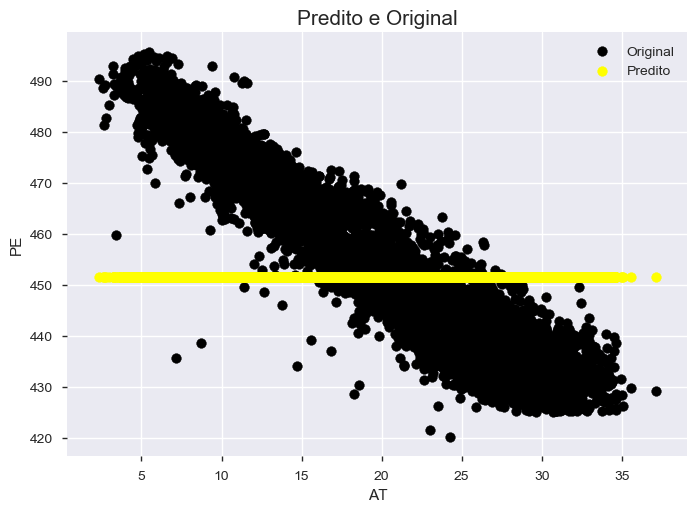

In [39]:
plt.scatter(x_train_sig ['AT'], y_train_sig ,  color='black')
plt.scatter(x_train_sig ['AT'], y_pred_sig , color='yellow')
plt.xlabel("AT")
plt.ylabel("PE")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

### Kernel Polinomial

In [40]:
svr_reg = SVR(kernel='poly', degree=3)

In [41]:
svr_reg.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

## Avaliação para Teste

In [42]:
y_pred = svr_reg.predict(x_test)
svr_metricas = metricas(y_test, y_pred, 'SVR - Polinomial - Teste')
lista_metricas_teste.append(svr_metricas)

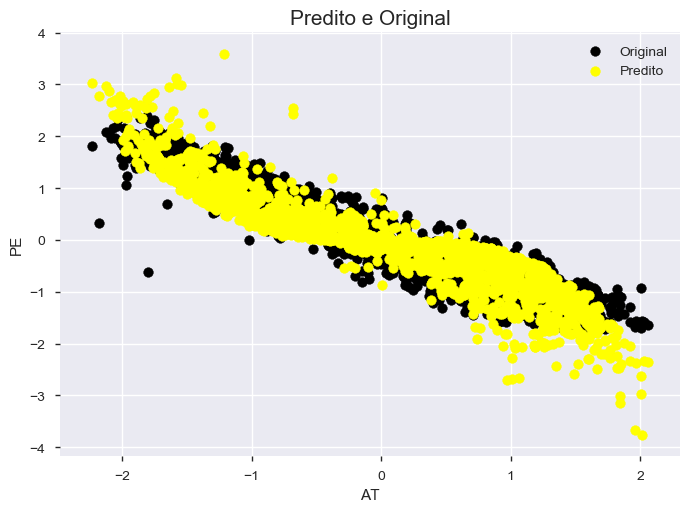

In [43]:
plt.scatter(x_test['AT'], y_test,  color='black')
plt.scatter(x_test['AT'], y_pred, color='yellow')
plt.xlabel("AT")
plt.ylabel("PE")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [44]:
y_pred = svr_reg.predict(x_train)
svr_metricas = metricas(y_train, y_pred, 'SVR - Polinomial - Treino')
lista_metricas_treino.append(svr_metricas)

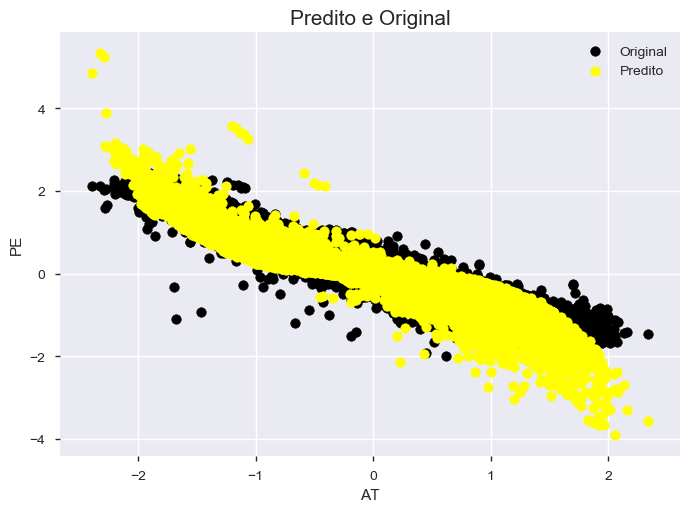

In [45]:
plt.scatter(x_train['AT'], y_train,  color='black')
plt.scatter(x_train['AT'], y_pred, color='yellow')
plt.xlabel("AT")
plt.ylabel("PE")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Redes Neurais

### Kernel Linear

In [46]:
mlp_reg = MLPRegressor()

In [47]:
mlp_reg.fit(x_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

## Avaliação para Teste

In [48]:
y_pred = mlp_reg.predict(x_test)
mlp_metricas = metricas(y_test, y_pred, 'MLP - Teste')
lista_metricas_teste.append(mlp_metricas)

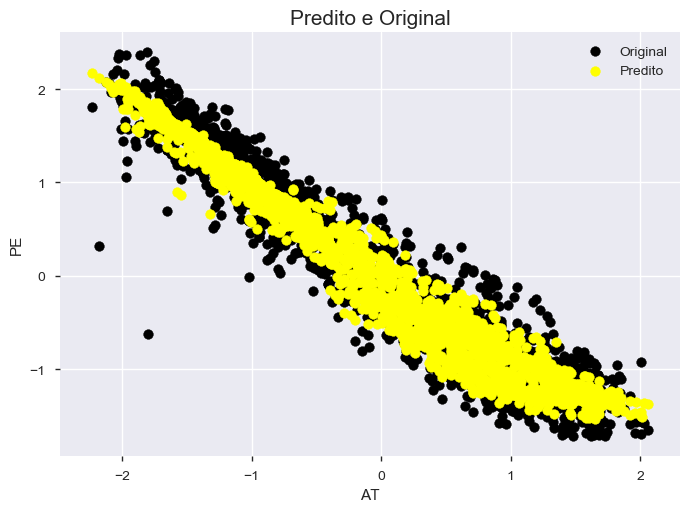

In [49]:
plt.scatter(x_test['AT'], y_test,  color='black')
plt.scatter(x_test['AT'], y_pred, color='yellow')
plt.xlabel("AT")
plt.ylabel("PE")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [50]:
y_pred = mlp_reg.predict(x_train)
mlp_metricas = metricas(y_train, y_pred, 'MLP - Treino')
lista_metricas_treino.append(mlp_metricas)

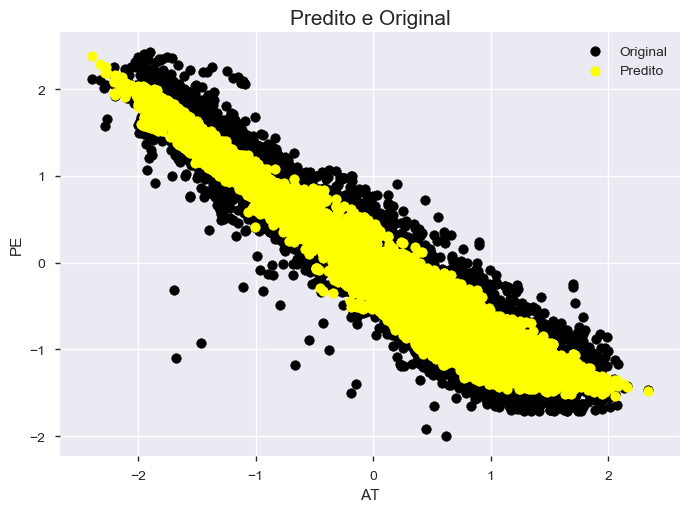

In [51]:
plt.scatter(x_train['AT'], y_train,  color='black')
plt.scatter(x_train['AT'], y_pred, color='yellow')
plt.xlabel("AT")
plt.ylabel("PE")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

# Resultados

In [90]:
metricas_teste = pd.DataFrame(lista_metricas_teste)
metricas_teste

,Algoritmo,EQM,R2,REQM,SEQ
0,Regressão Linear - Teste,0.067926,0.931975,0.260626,130.009759
1,SVR - RBF - Teste,0.053505,0.946416,0.231313,102.409518
2,SVR - Linear - Teste,0.068158,0.931742,0.261070,130.454018
3,SVR - Sigmoide - Teste,298.189833,-0.027406,17.268174,570735.340650
4,SVR - Polinomial - Teste,0.212430,0.787258,0.460902,406.591798
5,MLP - Teste,0.053479,0.946442,0.231255,102.358966


In [91]:
metricas_teste = round(metricas_teste, 3)

In [92]:
metricas_teste

,Algoritmo,EQM,R2,REQM,SEQ
0,Regressão Linear - Teste,0.068,0.932,0.261,130.010
1,SVR - RBF - Teste,0.054,0.946,0.231,102.410
2,SVR - Linear - Teste,0.068,0.932,0.261,130.454
3,SVR - Sigmoide - Teste,298.190,-0.027,17.268,570735.341
4,SVR - Polinomial - Teste,0.212,0.787,0.461,406.592
5,MLP - Teste,0.053,0.946,0.231,102.359


In [93]:
metricas_teste.to_excel('regressao1_metricas_teste.xlsx')

In [96]:
metricas_treino = pd.DataFrame(lista_metricas_treino)
metricas_treino

,Algoritmo,EQM,R2,REQM,SEQ
0,Regressão Linear - Treino,0.072155,0.927856,0.268616,5.522719e+02
1,SVR - RBF - Treino,0.054284,0.945725,0.232988,4.154867e+02
2,SVR - Linear - Treino,0.072541,0.927470,0.269334,5.552260e+02
3,SVR - Sigmoide - Treino,299.317510,-0.026797,17.300795,2.290976e+06
4,SVR - Polinomial - Treino,0.218906,0.781128,0.467874,1.675504e+03
5,MLP - Treino,0.054441,0.945568,0.233325,4.166893e+02


In [97]:
metricas_treino = round(metricas_treino, 3)

In [98]:
metricas_treino.to_excel('regressao1_metricas_treino.xlsx')